<a href="https://colab.research.google.com/github/intersectionblank/Ergasia4_TN/blob/main/MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [402]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [403]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [404]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [405]:
rows = 5
digits_per_row = 5

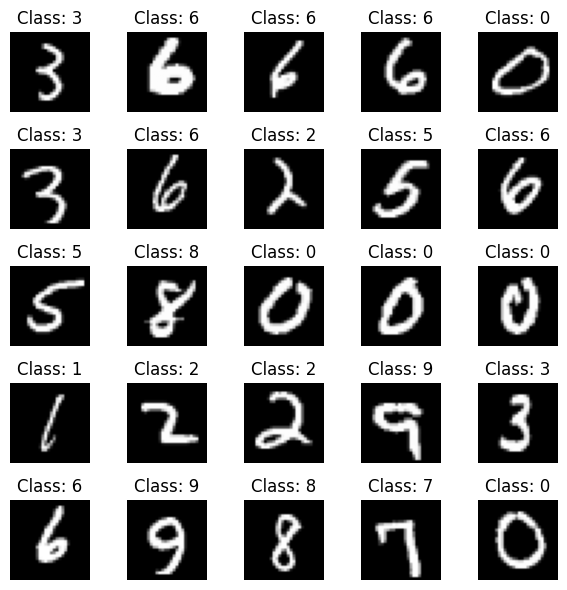

In [406]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [407]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [408]:
activation = 'relu'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

In [409]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [410]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8312 - loss: 4.1614 - val_accuracy: 0.9204 - val_loss: 0.4456
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9426 - loss: 0.3018 - val_accuracy: 0.9399 - val_loss: 0.3000
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9615 - loss: 0.1636 - val_accuracy: 0.9430 - val_loss: 0.2672
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9741 - loss: 0.0950 - val_accuracy: 0.9497 - val_loss: 0.2486
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9825 - loss: 0.0622 - val_accuracy: 0.9512 - val_loss: 0.2422
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9873 - loss: 0.0442 - val_accuracy: 0.9516 - val_loss: 0.2407
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9910 - loss: 0.0317 - val_accuracy: 0.9524 - val_loss: 0.2409
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9940 - loss: 0.023

# Display Loss and Accuracy per Training Epoch

In [411]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

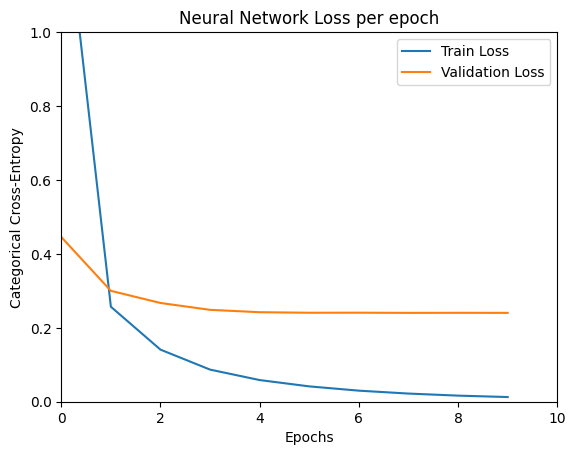

In [412]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

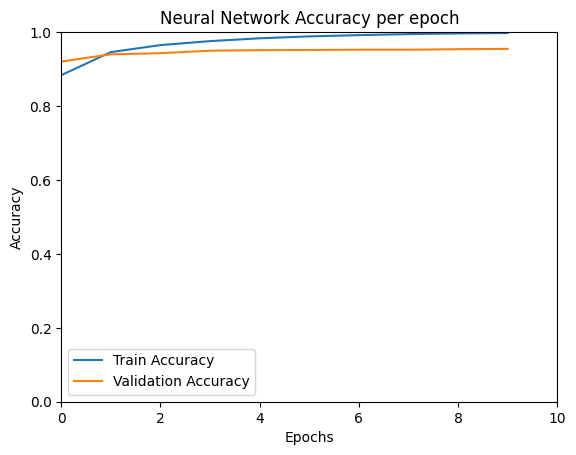

In [413]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


In [414]:
matrix={
    'Layers':[2,1,3,2,2,2,2,2,2,2,2],
    'Units':[(256,256),256,(256,256,256),(256,512),(512,512),(512,128),(128,128),(256,256),(256,256),(256,256),(256,256)],
    'Activation':['tanh','tanh','tanh','tanh','tanh','tanh','tanh','tanh','tanh','tanh','relu'],
    'Learning Rate':[0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.001,0.001,0.001],
    'Epochs':[10,10,10,10,10,10,10,10,15,5,10],
    'Validation Accuracy':[0.9358,0.9362,0.9318,0.9351,0.9435,0.9418,0.9235,0.9093,0.9442,0.9194,0.9546]
}

df=pd.DataFrame(matrix)#δημιουργώ dataframe
print(df)

    Layers            Units Activation  Learning Rate  Epochs  \
0        2       (256, 256)       tanh          0.001      10   
1        1              256       tanh          0.001      10   
2        3  (256, 256, 256)       tanh          0.001      10   
3        2       (256, 512)       tanh          0.001      10   
4        2       (512, 512)       tanh          0.001      10   
5        2       (512, 128)       tanh          0.001      10   
6        2       (128, 128)       tanh          0.001      10   
7        2       (256, 256)       tanh          0.010      10   
8        2       (256, 256)       tanh          0.001      15   
9        2       (256, 256)       tanh          0.001       5   
10       2       (256, 256)       relu          0.001      10   

    Validation Accuracy  
0                0.9358  
1                0.9362  
2                0.9318  
3                0.9351  
4                0.9435  
5                0.9418  
6                0.9235  
7          

Ιδανικά ένα loop που θα συνδύαζε όλες τις υποψήφιες παραμέτρους που θα είχα βάλει σε ένα σύνολο θα εμφάνιζε τον καλύτερο συνδυασμό, αυτό όμως λόγω του πλήθους των συνδυασμών και των πολλων εποχών είναι πολύ χρονοβόρο. 'Ετσι η αλλαγές έγιναν χειροκίνητα με βάση τις παραμέτρους του αρχικού κώδικα. Το μεγαλύτερο impact στην accuracy είχε η αλλαγή της συνάρτησης ενεργοποίησης σε relu , επίσης η αύξηση των εποχών και του πλήθους των Neurons κυρίως στο 1ο hidden layer βελτιώσε την accuracy ωστόσο όχι υπερβολικά με το ζήτημα της υπερπροσαρμογής να ανακύπτει , η άυξηση των Hidden layers δεν αύξησε την accuracy.

Δοκίμασα 3 Hidden layers είδα ότι δεν υπήρχε βελτίωση άρα δεν συνέχισα σε παραπάνω και για ζήτημα χρόνου.

Δοκίμασα 128,256,512 πλήθοι νευρώνων σαν δυνάμεις του 2 και είδα ότι πολλοί αυξάνουν τον χρόνο εκτέλεσης και λίγοι την  μειώνουν πολύ την ακρίβεια.

Δοκίμασα 5,10,15 εποχές , παρατήρησα ότι με 5 η ακρίβεια μειώνεται αρκετά άρα έχω υποπροσαρμογή και με τις 15 αυξάνεται άλλα με μικρότερο ρυθμό, άρα με περισσότερες μπορεί να γίνει υπερπροσαρμογή.


## 2. Validation: Show 1 misclassified digit from each class.

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

In [417]:
#Χρησιμοποίησα το Dropout το οποίο μηδενίζει τυχαία κατά την εκπαίδευση ένα ποσοστό των output νευρώνων σε κάθε επανάληψη για να αποτρέψει την εξάρτηση από συγκεκριμένους νευρώνες
tf.keras.layers.Dropout(0.2),#μετά από κάθε hidden layer στο model
#Αποτελέσματα με dropout την 10η season
#1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9412 - loss: 0.2194 - val_accuracy: 0.9556 - val_loss: 0.1917
#Αποτελέσματα χωρίς dropout την 10η season
#1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9973 - loss: 0.0134 - val_accuracy: 0.9546 - val_loss: 0.2404
#Παρατηρτώ επίσης ότι ωρίς Dropout, το μοντέλο έχει πολύ υψηλό accuracy στο training set,αλλά υψηλότερο validation loss δηλαδή υπερεκπαίδευση η οποία με το dropout αποφεύγεται.


(<Dropout name=dropout_12, built=True>,)

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [416]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
